# C-CORE STAC API
The C-CORE STAC API is a [STAC](https://stacspec.org/) compliant catalog of C-CORE earth observation and remote sensing products. It extends the [STAC FastAPI](https://github.com/stac-utils/stac-fastapi) library. Documentation is available at https://c-stac-api.c-core.app/docs .

## Base url for the API

In [1]:
api_url = "https://c-stac-api.c-core.app"

## Collections
Each C-CORE service (e.g. ice-drift-feature-tracking) is indexed as a collection. We can list all available collections.

### List all collections

In [2]:
import httpx


get_collections_url = f"{api_url}/collections"

with httpx.Client(timeout = 20) as client:
    response = client.get(get_collections_url)
    
response

<Response [200 OK]>

In [3]:
response_body = response.json()
collections = response_body["collections"]
collections

[{'type': 'Collection',
  'id': 'joplin',
  'stac_extensions': [],
  'stac_version': '1.0.0',
  'title': None,
  'description': 'This imagery was acquired by the NOAA Remote Sensing Division to support NOAA national security and emergency response requirements. In addition, it will be used for ongoing research efforts for testing and developing standards for airborne digital imagery. Individual images have been combined into a larger mosaic and tiled for distribution. The approximate ground sample distance (GSD) for each pixel is 35 cm (1.14 feet).',
  'keywords': None,
  'license': 'public-domain',
  'providers': None,
  'summaries': None,
  'extent': {'spatial': {'bbox': [[-94.6911621,
      37.0332547,
      -94.402771,
      37.1077651]]},
   'temporal': {'interval': [['2000-02-01T00:00:00Z',
      '2000-02-12T00:00:00Z']]}},
  'links': [{'rel': 'self',
    'type': 'application/json',
    'href': 'http://c-stac-api.c-core.app/collections/joplin'},
   {'rel': 'parent',
    'type': '

### List single collection

In [4]:
collection_id = "ice-drift-feature-tracking"
get_collections_url = f"{api_url}/collections/{collection_id}"

with httpx.Client(timeout = 20) as client:
    response = client.get(get_collections_url)
    
response

<Response [200 OK]>

In [5]:
response_body = response.json()
response_body

{'type': 'Collection',
 'id': 'ice-drift-feature-tracking',
 'stac_extensions': [],
 'stac_version': '1.0.0',
 'title': 'Ice Drift Feature Tracking',
 'description': 'Ice drift feature tracking derived from Sentinel 1 data.',
 'keywords': ['Sentinel 1', 'SAR', 'sea ice'],
 'license': 'public-domain',
 'providers': ['C-CORE', 'ESA'],
 'summaries': None,
 'extent': {'spatial': {'bbox': [[-180, -90, 180, 90]]},
  'temporal': {'interval': [['2010-01-01T00:00:00Z',
     '2030-01-01T00:00:00Z']]}},
 'links': [{'rel': 'self',
   'type': 'application/json',
   'href': 'http://c-stac-api.c-core.app/collections/ice-drift-feature-tracking'},
  {'rel': 'parent',
   'type': 'application/json',
   'href': 'http://c-stac-api.c-core.app/'},
  {'rel': 'items',
   'type': 'application/geo+json',
   'href': 'http://c-stac-api.c-core.app/collections/ice-drift-feature-tracking/items'},
  {'rel': 'root',
   'type': 'application/json',
   'href': 'http://c-stac-api.c-core.app/'}]}

## Items
Each collection has a list of items. Each item maps to a product (e.g. an ice-drift-feature-tracking product derived from a single Sentinel 1 scene).

### List all items in a collection
We specify an optional `limit` of 2 just to keep the example simple. The default `limit` is 10 and can be increased to an arbitrary high integer.

In [6]:
collection_id = "ice-drift-feature-tracking"
limit = 2
get_items_url = f"{api_url}/collections/{collection_id}/items?limit={limit}"

with httpx.Client(timeout = 20) as client:
    response = client.get(get_items_url)
    
response

<Response [200 OK]>

In [7]:
response_body = response.json()
response_body

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'stac_version': '1.0.0',
   'stac_extensions': [],
   'id': 'ice-drift-feature-tracking-2020-09-12T21:13:58.431Z--2020-09-13T11:19:53.117Z',
   'collection': 'ice-drift-feature-tracking',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-58.56408, 75.296111],
      [-58.56408, 77.419261],
      [-68.121641, 77.419261],
      [-68.121641, 75.296111],
      [-58.56408, 75.296111]]]},
   'bbox': [-68.121641, 75.296111, -58.56408, 77.419261],
   'properties': {'format': 'pbf',
    'created': '2021-10-08T18:11:52Z',
    'updated': '2021-10-08T18:11:52Z',
    'datetime': '2020-09-12T21:13:58Z',
    'latitude': 76.058445,
    'tile_url': 'https://coresight-layers.s3-us-west-2.amazonaws.com/ice-drift-feature-tracking/2020-09-12T21:13:58.431Z--2020-09-13T11:19:53.117Z/{z}/{x}/{y}.pbf',
    'longitude': -64.863281,
    'geojson_url': 'https://coresight-layers.s3-us-west-2.amazonaws.com/ice-drift-feature-tracking/2020-09-1

## List the next items
The results are paginated, returning just `limit` number of items per request. To view the next `limit` number of items, use the `next` `link`.

In [8]:
next_link = response_body["links"][0]
next_link

{'rel': 'next',
 'type': 'application/geo+json',
 'href': 'http://c-stac-api.c-core.app/collections/ice-drift-feature-tracking/items?token=mUoVCigD&limit=2',
 'method': 'GET'}

The `href` string is the url to fetch the next list of items.

In [9]:
next_link["href"]

'http://c-stac-api.c-core.app/collections/ice-drift-feature-tracking/items?token=mUoVCigD&limit=2'

In [10]:
with httpx.Client(timeout = 20, follow_redirects=True) as client:
    response = client.get(next_link["href"])
    
response_body = response.json()
response_body

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'stac_version': '1.0.0',
   'stac_extensions': [],
   'id': 'ice-drift-feature-tracking-2020-09-12T21:12:58.431Z--2020-09-13T11:19:53.117Z',
   'collection': 'ice-drift-feature-tracking',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-57.220857, 73.941783],
      [-57.220857, 75.154876],
      [-59.187606, 75.154876],
      [-59.187606, 73.941783],
      [-57.220857, 73.941783]]]},
   'bbox': [-59.187606, 73.941783, -57.220857, 75.154876],
   'properties': {'format': 'pbf',
    'created': '2021-10-08T18:11:51Z',
    'updated': '2021-10-08T18:11:51Z',
    'datetime': '2020-09-12T21:12:58Z',
    'latitude': 74.91364,
    'tile_url': 'https://coresight-layers.s3-us-west-2.amazonaws.com/ice-drift-feature-tracking/2020-09-12T21:12:58.431Z--2020-09-13T11:19:53.117Z/{z}/{x}/{y}.pbf',
    'longitude': -57.480469,
    'geojson_url': 'https://coresight-layers.s3-us-west-2.amazonaws.com/ice-drift-feature-tracking/2020-0

### Search items
An example of searching by a datetime interval

In [11]:
collection_id = "ice-drift-feature-tracking"

start_datetime = "2020-09-12T00:00:00.00Z"
end_datetime = "2020-09-14T00:00:00.00Z"
datetime_interval = f"{start_datetime}/{end_datetime}"

search_url = f"{api_url}/search?collections={collection_id}&datetime={datetime_interval}"

with httpx.Client(timeout = 20) as client:
    response = client.get(search_url)
    
search_response_body = response.json()

## For this example, only show last two
search_response_features = search_response_body["features"]
search_response_features[-2:]

[{'type': 'Feature',
  'geometry': {'coordinates': [[[-53.639539, 66.373537],
     [-53.639539, 67.743067],
     [-57.474565, 67.743067],
     [-57.474565, 66.373537],
     [-53.639539, 66.373537]]],
   'type': 'Polygon'},
  'properties': {'datetime': '2020-09-12T21:10:58+00:00'},
  'id': 'ice-drift-feature-tracking-2020-09-12T21:10:58.432Z--2020-09-13T21:02:47.886Z',
  'bbox': [-57.474565, 66.373537, -53.639539, 67.743067],
  'assets': {'geojson': {'title': 'GeoJSON',
    'description': 'Vector data in GeoJSON format',
    'start_datetime': None,
    'end_datetime': None,
    'created': None,
    'updated': None,
    'platform': None,
    'instruments': None,
    'constellation': None,
    'mission': None,
    'providers': None,
    'gsd': None,
    'href': 'https://coresight-layers.s3-us-west-2.amazonaws.com/ice-drift-feature-tracking/2020-09-12T21:10:58.432Z--2020-09-13T21:02:47.886Z/2020-09-12T21:10:58.432Z--2020-09-13T21:02:47.886Z.geojson',
    'type': 'application/geo+json',
   

## Get individual item by ID

In [12]:
item_id = "ice-drift-feature-tracking-2020-09-12T21:10:58.432Z--2020-09-13T21:02:47.886Z"
collection_id = "ice-drift-feature-tracking"

get_item_url = f"{api_url}/collections/{collection_id}/items/{item_id}"

with httpx.Client(timeout = 20) as client:
    response = client.get(get_item_url)
    
item = response.json()
item

{'type': 'Feature',
 'stac_version': '1.0.0',
 'stac_extensions': [],
 'id': 'ice-drift-feature-tracking-2020-09-12T21:10:58.432Z--2020-09-13T21:02:47.886Z',
 'collection': 'ice-drift-feature-tracking',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-53.639539, 66.373537],
    [-53.639539, 67.743067],
    [-57.474565, 67.743067],
    [-57.474565, 66.373537],
    [-53.639539, 66.373537]]]},
 'bbox': [-57.474565, 66.373537, -53.639539, 67.743067],
 'properties': {'format': 'pbf',
  'created': '2021-10-08T18:11:51Z',
  'updated': '2021-10-08T18:11:51Z',
  'datetime': '2020-09-12T21:10:58Z',
  'latitude': 67.67599,
  'tile_url': 'https://coresight-layers.s3-us-west-2.amazonaws.com/ice-drift-feature-tracking/2020-09-12T21:10:58.432Z--2020-09-13T21:02:47.886Z/{z}/{x}/{y}.pbf',
  'longitude': -53.639539,
  'geojson_url': 'https://coresight-layers.s3-us-west-2.amazonaws.com/ice-drift-feature-tracking/2020-09-12T21:10:58.432Z--2020-09-13T21:02:47.886Z/2020-09-12T21:10:58.432Z--2020-09-13T

## Links
Links provide URLs to related metadata. For example, the `self` link provides an URL for this STAC item.

In [13]:
self_link = [link for link in item["links"] if link["rel"] == "self"][0]
self_link

{'rel': 'self',
 'type': 'application/geo+json',
 'href': 'http://c-stac-api.c-core.app/collections/ice-drift-feature-tracking/items/ice-drift-feature-tracking-2020-09-12T21:10:58.432Z--2020-09-13T21:02:47.886Z'}

### Read `self` link as a data frame
We can use GeoPandas to directly read the metadata from the `self` link.

In [14]:
import geopandas as gpd


self_gdf = gpd.read_file(self_link["href"])
self_gdf

,id,format,created,updated,datetime,latitude,tile_url,longitude,geojson_url,datetime_end,maximum_zoom,metadata_url,minimum_zoom,timestamp_end,datetime_start,timestamp_mean,timestamp_start,datetime_interval,geometry
0,ice-drift-feature-tracking-2020-09-12T21:10:58...,pbf,2021-10-08T18:11:51+00:00,2021-10-08T18:11:51+00:00,2020-09-12T21:10:58+00:00,67.67599,https://coresight-layers.s3-us-west-2.amazonaw...,-53.639539,https://coresight-layers.s3-us-west-2.amazonaw...,2020-09-13T21:02:47.886002+00:00,10,https://coresight-layers.s3-us-west-2.amazonaw...,1,1.600040e+09,2020-09-12T21:10:58.431999+00:00,1.599997e+09,1.599954e+09,2020-09-12T21:10:58.431999+00:00,"POLYGON ((-53.63954 66.37354, -53.63954 67.743..."


<AxesSubplot:>

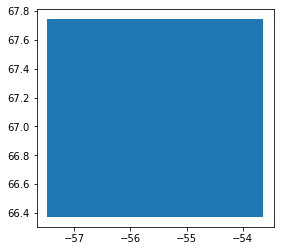

In [15]:
self_gdf.plot()

Alternatively, we can read the item from memory.

In [16]:
import json


item_gdf = gpd.read_file(json.dumps(item))
item_gdf

,id,format,created,updated,datetime,latitude,tile_url,longitude,geojson_url,datetime_end,maximum_zoom,metadata_url,minimum_zoom,timestamp_end,datetime_start,timestamp_mean,timestamp_start,datetime_interval,geometry
0,ice-drift-feature-tracking-2020-09-12T21:10:58...,pbf,2021-10-08T18:11:51+00:00,2021-10-08T18:11:51+00:00,2020-09-12T21:10:58+00:00,67.67599,https://coresight-layers.s3-us-west-2.amazonaw...,-53.639539,https://coresight-layers.s3-us-west-2.amazonaw...,2020-09-13T21:02:47.886002+00:00,10,https://coresight-layers.s3-us-west-2.amazonaw...,1,1.600040e+09,2020-09-12T21:10:58.431999+00:00,1.599997e+09,1.599954e+09,2020-09-12T21:10:58.431999+00:00,"POLYGON ((-53.63954 66.37354, -53.63954 67.743..."


We can even read the search results from memory into a data frame.

In [17]:
response_features_gdf = gpd.read_file(json.dumps(search_response_body))
response_features_gdf

,id,datetime,geometry
0,ice-drift-feature-tracking-2020-09-12T21:13:58...,2020-09-12T21:13:58+00:00,"POLYGON ((-58.56408 75.29611, -58.56408 77.419..."
1,ice-drift-feature-tracking-2020-09-12T21:13:58...,2020-09-12T21:13:58+00:00,"POLYGON ((-66.59317 76.40996, -66.59317 78.064..."
2,ice-drift-feature-tracking-2020-09-12T21:12:58...,2020-09-12T21:12:58+00:00,"POLYGON ((-57.22086 73.94178, -57.22086 75.154..."
3,ice-drift-feature-tracking-2020-09-12T21:12:58...,2020-09-12T21:12:58+00:00,"POLYGON ((-60.00807 71.53963, -60.00807 73.130..."
4,ice-drift-feature-tracking-2020-09-12T21:12:58...,2020-09-12T21:12:58+00:00,"POLYGON ((-55.04194 71.25854, -55.04194 73.748..."
5,ice-drift-feature-tracking-2020-09-12T21:12:58...,2020-09-12T21:12:58+00:00,"POLYGON ((-56.93090 73.63558, -56.93090 74.955..."
6,ice-drift-feature-tracking-2020-09-12T21:11:58...,2020-09-12T21:11:58+00:00,"POLYGON ((-56.21851 67.51569, -56.21851 69.397..."
7,ice-drift-feature-tracking-2020-09-12T21:11:58...,2020-09-12T21:11:58+00:00,"POLYGON ((-55.53044 70.35191, -55.53044 71.546..."
8,ice-drift-feature-tracking-2020-09-12T21:10:58...,2020-09-12T21:10:58+00:00,"POLYGON ((-53.63954 66.37354, -53.63954 67.743..."
9,ice-drift-feature-tracking-2020-09-12T20:23:31...,2020-09-12T20:23:31+00:00,"POLYGON ((-57.31524 74.28129, -57.31524 76.049..."


<AxesSubplot:>

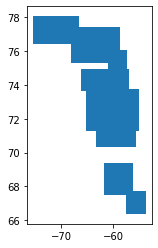

In [18]:
response_features_gdf.plot()

## Assets
STAC items only contain metadata about the product. STAC items do not contain product data. STAC items do, however, have assets. Assets provide links to the product data.

The `ice-drift-feature-tracking` STAC items contain `geojson`, `vector_tiles`, and `vector_tiles_metadata` assets. The `geojson` asset allows a user to load the product data for further analysis or exploration. The `vector_tiles` asset provides prduct data in tiles optimized for display ina web browser.

In [19]:
assets = item["assets"]
assets

{'geojson': {'href': 'https://coresight-layers.s3-us-west-2.amazonaws.com/ice-drift-feature-tracking/2020-09-12T21:10:58.432Z--2020-09-13T21:02:47.886Z/2020-09-12T21:10:58.432Z--2020-09-13T21:02:47.886Z.geojson',
  'type': 'application/geo+json',
  'roles': ['vector-data'],
  'title': 'GeoJSON',
  'description': 'Vector data in GeoJSON format'},
 'vector_tiles': {'href': 'https://coresight-layers.s3-us-west-2.amazonaws.com/ice-drift-feature-tracking/2020-09-12T21:10:58.432Z--2020-09-13T21:02:47.886Z/{z}/{x}/{y}.pbf',
  'type': 'application/vnd.mapbox-vector-tile',
  'roles': ['vector-data', 'vector-tiles'],
  'title': 'Mapbox Vector Tiles',
  'description': 'Vector data in Mapbox Vector Tile format'},
 'vector_tiles_metadata': {'href': 'https://coresight-layers.s3-us-west-2.amazonaws.com/ice-drift-feature-tracking/2020-09-12T21:10:58.432Z--2020-09-13T21:02:47.886Z/metadata.json',
  'type': 'application/json',
  'roles': ['metadata'],
  'title': 'Vector Tiles Metadata',
  'description':

## GeoJSON
Let's load the GeoJSON data as a data frame.

In [20]:
geojson_url = assets["geojson"]["href"]
geojson_gdf = gpd.read_file(geojson_url)
geojson_gdf

,bearing,datetime_interval,deltatime_hrs,disp_m,geometry_type,id,ogc_fid,r,speed_ms,timedelta_seconds,timestamp1,timestamp2,updated,geometry
0,-2.105023,2020-09-12T21:10:58.431999+00:00,23.863737,41324.189422,linestring,ft26,6001125,0.641481,0.481020,85909,2020-09-12T21:10:58.431999+00:00,2020-09-13T21:02:47.886002+00:00,2020-11-25T02:30:25.799459,"LINESTRING (-57.43878 67.22637, -57.47457 67.5..."
1,-7.400396,2020-09-12T21:10:58.431999+00:00,23.863737,65503.653558,linestring,ft27,6001126,0.572165,0.762473,85909,2020-09-12T21:10:58.431999+00:00,2020-09-13T21:02:47.886002+00:00,2020-11-25T02:30:25.799459,"LINESTRING (-55.01837 66.37354, -55.21202 66.9..."
2,-142.813816,2020-09-12T21:10:58.431999+00:00,23.863737,79.983978,linestring,ft18,6001127,0.857552,0.000931,85909,2020-09-12T21:10:58.431999+00:00,2020-09-13T21:02:47.886002+00:00,2020-11-25T02:30:25.799459,"LINESTRING (-53.71827 67.71887, -53.71942 67.7..."
3,-142.821708,2020-09-12T21:10:58.431999+00:00,23.863737,79.981614,linestring,ft6,6001128,0.860653,0.000931,85909,2020-09-12T21:10:58.431999+00:00,2020-09-13T21:02:47.886002+00:00,2020-11-25T02:30:25.799459,"LINESTRING (-53.72703 67.74307, -53.72818 67.7..."
4,-142.770509,2020-09-12T21:10:58.431999+00:00,23.863737,79.986678,linestring,ft25,6001129,0.664329,0.000931,85909,2020-09-12T21:10:58.431999+00:00,2020-09-13T21:02:47.886002+00:00,2020-11-25T02:30:25.799459,"LINESTRING (-53.67020 67.69055, -53.67134 67.6..."
5,-142.742893,2020-09-12T21:10:58.431999+00:00,23.863737,79.984690,linestring,ft15,6001130,0.897508,0.000931,85909,2020-09-12T21:10:58.431999+00:00,2020-09-13T21:02:47.886002+00:00,2020-11-25T02:30:25.799459,"LINESTRING (-53.63954 67.71063, -53.64069 67.7..."
6,172.243734,2020-09-12T21:10:58.431999+00:00,23.863737,113.156434,linestring,ft9,6001131,0.706779,0.001317,85909,2020-09-12T21:10:58.431999+00:00,2020-09-13T21:02:47.886002+00:00,2020-11-25T02:30:25.799459,"LINESTRING (-53.65136 67.72850, -53.65100 67.7..."
7,-142.771178,2020-09-12T21:10:58.431999+00:00,23.863737,79.982071,linestring,ft3,6001132,0.893409,0.000931,85909,2020-09-12T21:10:58.431999+00:00,2020-09-13T21:02:47.886002+00:00,2020-11-25T02:30:25.799459,"LINESTRING (-53.67094 67.73776, -53.67209 67.7..."
8,-2.105023,2020-09-12T21:10:58.431999+00:00,23.863737,41324.189422,point,ft26,6001125,0.641481,0.481020,85909,2020-09-12T21:10:58.431999+00:00,2020-09-13T21:02:47.886002+00:00,2020-11-25T02:30:25.799459,POINT (-57.47457 67.59775)
9,-7.400396,2020-09-12T21:10:58.431999+00:00,23.863737,65503.653558,point,ft27,6001126,0.572165,0.762473,85909,2020-09-12T21:10:58.431999+00:00,2020-09-13T21:02:47.886002+00:00,2020-11-25T02:30:25.799459,POINT (-55.21202 66.95761)


<AxesSubplot:>

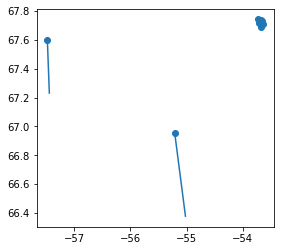

In [21]:
geojson_gdf.plot()

## Vector Tiles
View vector tiles in a web browser map.

In [38]:
import os
from mapboxgl.utils import create_color_stops, df_to_geojson
from mapboxgl.viz import CircleViz, LinestringViz


token = os.getenv("MAPBOX_ACCESS_TOKEN")


vector_tiles_url = assets["vector_tiles"]["href"]

print(vector_tiles_url)
viz = LinestringViz([geojson_url],
                    access_token=token,
                    vector_url='mapbox://mapbox.mapbox-terrain-v2',
                    vector_layer_name='ice-drift-feature-tracking',
                    # vector_join_property='ele',
                    # data_join_property='elevation',
                    # color_property='elevation',
                    # color_stops=create_color_stops([0, 25, 50, 75, 100], colors='YlOrRd'),
                    # line_stroke='-',
                    line_width_default=2,
                    opacity=1,
                    center=(-53.64069, 67.71005),
                    zoom=5,
                    below_layer='waterway-label')

viz.show()

https://coresight-layers.s3-us-west-2.amazonaws.com/ice-drift-feature-tracking/2020-09-12T21:10:58.432Z--2020-09-13T21:02:47.886Z/{z}/{x}/{y}.pbf


In [85]:
viz.data

'https://coresight-layers.s3-us-west-2.amazonaws.com/ice-drift-feature-tracking/2020-09-12T21:10:58.432Z--2020-09-13T21:02:47.886Z/2020-09-12T21:10:58.432Z--2020-09-13T21:02:47.886Z.geojson'

In [23]:
vector_tiles_url = assets["vector_tiles"]["href"]

In [24]:
from ipyleaflet import Map, VectorTileLayer

In [25]:
m = Map(center=(-53.64069, 67.71005), zoom=6)
vl = VectorTileLayer(url=vector_tiles_url)
m.add_layer(vl)
m

Map(center=[-53.64069, 67.71005], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …